**Tamrin 1_2**

In [5]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
import sklearn.metrics as mc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_decision_regions

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
X,y=make_classification(n_samples=2000, n_features=2,n_redundant=0,n_clusters_per_class=1,n_classes=2,class_sep=1,random_state=4)
print(X.shape)
print(y.shape)


(2000, 2)
(2000,)


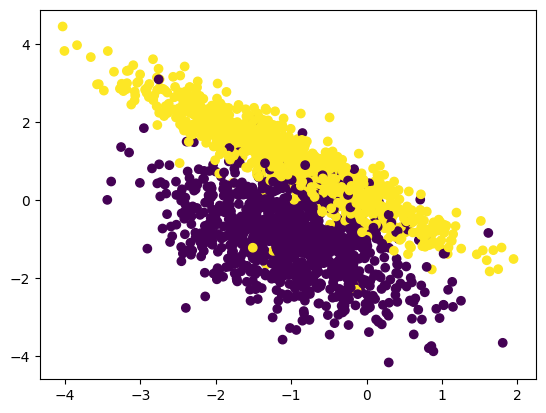

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)


**Tamrin 1_3**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4,stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 2), (1600,), (400, 2), (400,))

In [8]:
labels,counts=np.unique(y_train,return_counts=True)
print(counts/float(len(y)))
labels,counts=np.unique(y_test,return_counts=True)
print(counts/float(len(y)))


[0.397 0.403]
[0.0995 0.1005]


In [9]:
lr_model = LogisticRegression(solver='sag', max_iter=20, random_state=4)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = lr_model.score(x_train, y_train)
test_accuracy = lr_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

#ماتریس در هم ریختگی
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 94.25%
Training Accuracy: 92.94%
Testing Accuracy: 94.25%
Confusion Matrix:
[[180  19]
 [  4 197]]
[[1.18406511e-01 8.81593489e-01]
 [6.61237133e-01 3.38762867e-01]
 [1.32028608e-02 9.86797139e-01]
 [1.59422429e-02 9.84057757e-01]
 [1.35787431e-02 9.86421257e-01]
 [3.90686225e-02 9.60931377e-01]
 [1.96442821e-02 9.80355718e-01]
 [1.99053063e-01 8.00946937e-01]
 [9.80694334e-01 1.93056664e-02]
 [9.99122382e-01 8.77618416e-04]
 [9.89265768e-01 1.07342322e-02]
 [4.23270897e-02 9.57672910e-01]
 [1.01188242e-01 8.98811758e-01]
 [4.20772280e-01 5.79227720e-01]
 [9.99831192e-01 1.68808170e-04]
 [9.99455287e-01 5.44712587e-04]
 [8.94953701e-01 1.05046299e-01]
 [3.13545275e-01 6.86454725e-01]
 [3.85159613e-01 6.14840387e-01]
 [9.99449454e-01 5.50545743e-04]]
[ True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  Tru

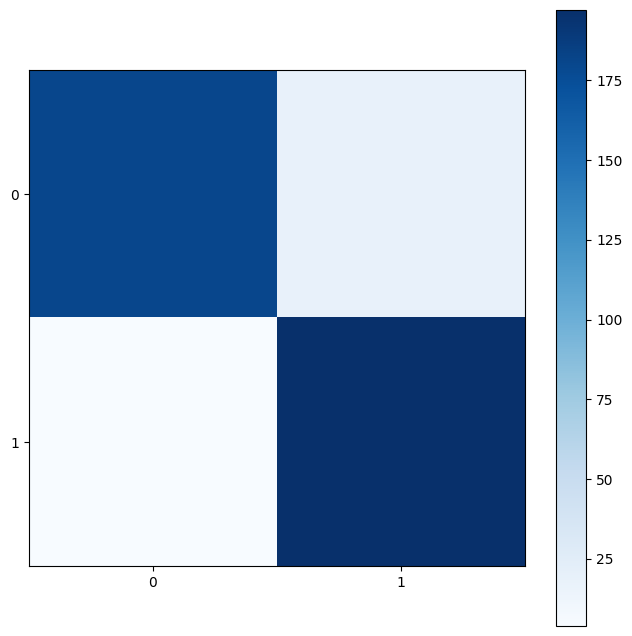

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(range(2))
plt.yticks(range(2))
plt.colorbar()
plt.show()

In [11]:
model_sgd=SGDClassifier(loss="hinge",max_iter=2000, random_state=4,learning_rate='optimal',alpha=0.01)

model_sgd.fit(x_train, y_train)
y_pred = model_sgd.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = model_sgd.score(x_train, y_train)
test_accuracy = model_sgd.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

#ماتریس در هم ریختگی
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 94.50%
Training Accuracy: 92.88%
Testing Accuracy: 94.50%
Confusion Matrix:
[[180  19]
 [  3 198]]
[[1.18406511e-01 8.81593489e-01]
 [6.61237133e-01 3.38762867e-01]
 [1.32028608e-02 9.86797139e-01]
 [1.59422429e-02 9.84057757e-01]
 [1.35787431e-02 9.86421257e-01]
 [3.90686225e-02 9.60931377e-01]
 [1.96442821e-02 9.80355718e-01]
 [1.99053063e-01 8.00946937e-01]
 [9.80694334e-01 1.93056664e-02]
 [9.99122382e-01 8.77618416e-04]
 [9.89265768e-01 1.07342322e-02]
 [4.23270897e-02 9.57672910e-01]
 [1.01188242e-01 8.98811758e-01]
 [4.20772280e-01 5.79227720e-01]
 [9.99831192e-01 1.68808170e-04]
 [9.99455287e-01 5.44712587e-04]
 [8.94953701e-01 1.05046299e-01]
 [3.13545275e-01 6.86454725e-01]
 [3.85159613e-01 6.14840387e-01]
 [9.99449454e-01 5.50545743e-04]]
[ True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  Tru

# **tamrin 1_4**

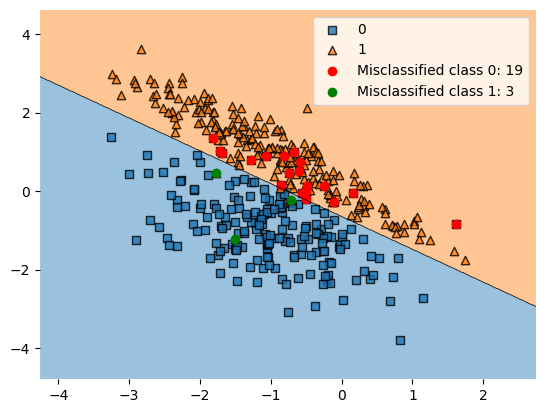

In [12]:
plot_decision_regions(x_test,y_test,clf=lr_model)
# شناسایی داده‌های اشتباه کلاس‌بندی شده
misclassified = np.where(y_test != y_pred)

# تعداد خطاهای کلاس‌بندی شده برای هر کلاس
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 0 با رنگ قرمز
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 1 با رنگ سبز
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')
plt.legend()


In [14]:
!pip install drawdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

# **tamrin 1_5**

In [1]:
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [2]:
widget.data
widget_data=widget.data_as_pandas

In [29]:
!gdown 1hA-Uvoqa5pRXOrQS7R4dzVV7rSKEtuJl

Downloading...
From: https://drive.google.com/uc?id=1hA-Uvoqa5pRXOrQS7R4dzVV7rSKEtuJl
To: /content/drawdata_2.csv
100% 47.2k/47.2k [00:00<00:00, 52.1MB/s]


In [3]:
widget_data.to_csv('/content/drive/MyDrive/mini_project_1/dataset/drawdata_2.csv', index=False)


In [8]:
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/mini_project_1/dataset/drawdata_2.csv')

In [9]:
df=df.drop(columns=['color'])
df.keys()

Index(['x', 'y', 'label'], dtype='object')

In [10]:
print(df.shape)
df

(1011, 3)


,x,y,label
0,145.523539,462.089725,a
1,136.386809,424.665452,a
2,111.994418,418.772924,a
3,129.777230,374.301639,a
4,83.243550,322.614632,a
...,...,...,...
1006,708.118661,235.678515,c
1007,725.701293,238.205783,c
1008,735.801119,209.377308,c
1009,728.260475,230.634910,c


Dimensions of the dataframe: (1011, 3)


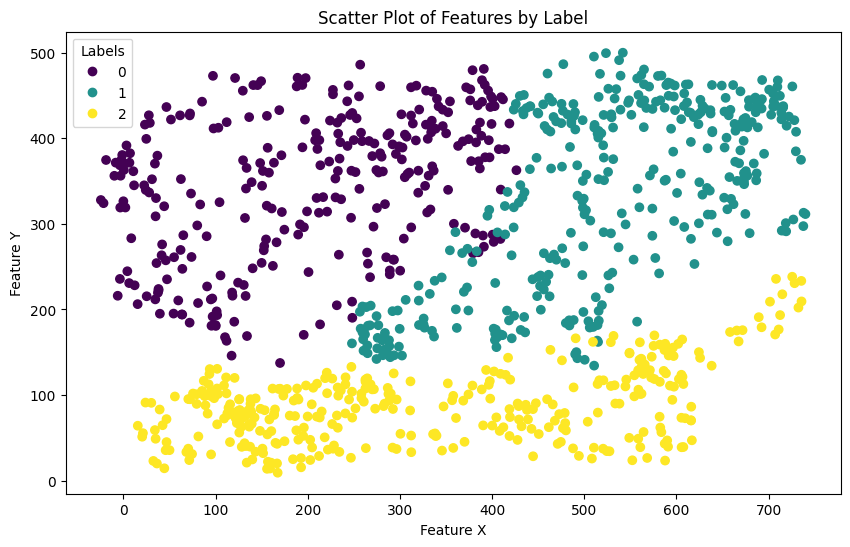

In [11]:
print(f"Dimensions of the dataframe: {df.shape}")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x'], df['y'], c=df['label'].astype('category').cat.codes, cmap='viridis')
plt.title('Scatter Plot of Features by Label')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [12]:
df

,x,y,label
0,145.523539,462.089725,a
1,136.386809,424.665452,a
2,111.994418,418.772924,a
3,129.777230,374.301639,a
4,83.243550,322.614632,a
...,...,...,...
1006,708.118661,235.678515,c
1007,725.701293,238.205783,c
1008,735.801119,209.377308,c
1009,728.260475,230.634910,c


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])
df

,x,y,label
0,0.222413,0.922951,a
1,0.210462,0.846675,a
2,0.178558,0.834666,a
3,0.201817,0.744027,a
4,0.140954,0.638681,a
...,...,...,...
1006,0.958256,0.461492,c
1007,0.981253,0.466643,c
1008,0.994464,0.407887,c
1009,0.984601,0.451213,c


In [14]:
label_mapping = {'a': 0, 'b': 1, 'c': 2}
# تبدیل برچسب‌های متنی به اعداد با استفاده
df['label_new'] = df['label'].map(label_mapping)
print(df)


             x         y label  label_new
0     0.222413  0.922951     a          0
1     0.210462  0.846675     a          0
2     0.178558  0.834666     a          0
3     0.201817  0.744027     a          0
4     0.140954  0.638681     a          0
...        ...       ...   ...        ...
1006  0.958256  0.461492     c          2
1007  0.981253  0.466643     c          2
1008  0.994464  0.407887     c          2
1009  0.984601  0.451213     c          2
1010  0.994140  0.456734     c          2

[1011 rows x 4 columns]


In [15]:
X=df.iloc[:,0:2].values
y=df.iloc[:,3].values
print(X.shape)
print(y.shape)
print(X)
print(y)

(1011, 2)
(1011,)
[[0.22241263 0.92295148]
 [0.21046228 0.84667534]
 [0.17855837 0.83466551]
 ...
 [0.99446351 0.40788663]
 [0.98460076 0.45121273]
 [0.9941402  0.45673444]]
[0 0 0 ... 2 2 2]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4,stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((808, 2), (808,), (203, 2), (203,))

In [17]:
y_train

array([0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2,

In [18]:
labels,counts=np.unique(y_train,return_counts=True)
print(counts/float(len(y)))
labels,counts=np.unique(y_test,return_counts=True)
print(counts/float(len(y)))


[0.23244313 0.28783383 0.27893175]
[0.05835806 0.07220574 0.0702275 ]


In [22]:
lr_model = LogisticRegression(solver='sag', max_iter=100, random_state=4)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = lr_model.score(x_train, y_train)
test_accuracy = lr_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

#ماتریس در هم ریختگی
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
error = mc.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {error:.5f}\n")
print(lr_model.predict_proba(x_test)[-10:])


Accuracy: 88.67%
Training Accuracy: 90.10%
Testing Accuracy: 88.67%
Confusion Matrix:
[[54  5  0]
 [ 2 59 12]
 [ 0  4 67]]
Mean Squared Error (MSE): 0.11330

[[0.93453588 0.02757831 0.03788581]
 [0.00282476 0.05334553 0.94382972]
 [0.29730238 0.69875571 0.00394192]
 [0.11019651 0.88641967 0.00338382]
 [0.04157708 0.95694816 0.00147477]
 [0.05387113 0.37823248 0.56789639]
 [0.64618899 0.31055456 0.04325645]
 [0.11635067 0.83097617 0.05267316]
 [0.60296699 0.38362596 0.01340705]
 [0.00577143 0.39912395 0.59510462]]


In [25]:
model_sgd=SGDClassifier(loss="hinge",max_iter=700, random_state=4,learning_rate='optimal',alpha=0.002)

model_sgd.fit(x_train, y_train)
y_pred = model_sgd.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = model_sgd.score(x_train, y_train)
test_accuracy = model_sgd.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 88.67%
Training Accuracy: 86.76%
Testing Accuracy: 88.67%
Confusion Matrix:
[[55  2  2]
 [ 0 56 17]
 [ 0  2 69]]
[[0.03614204 0.05717131 0.90668665]
 [0.15015102 0.83730693 0.01254205]
 [0.04363314 0.31424313 0.64212373]
 [0.03801977 0.94119385 0.02078638]
 [0.09918509 0.04844483 0.85237008]
 [0.98199699 0.01643848 0.00156454]
 [0.79438417 0.20394064 0.00167519]
 [0.13623135 0.86032565 0.003443  ]
 [0.07057346 0.8486438  0.08078274]
 [0.0244141  0.89439581 0.08119009]
 [0.93453588 0.02757831 0.03788581]
 [0.00282476 0.05334553 0.94382972]
 [0.29730238 0.69875571 0.00394192]
 [0.11019651 0.88641967 0.00338382]
 [0.04157708 0.95694816 0.00147477]
 [0.05387113 0.37823248 0.56789639]
 [0.64618899 0.31055456 0.04325645]
 [0.11635067 0.83097617 0.05267316]
 [0.60296699 0.38362596 0.01340705]
 [0.00577143 0.39912395 0.59510462]]
[ True  True  True  True False  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  Tr

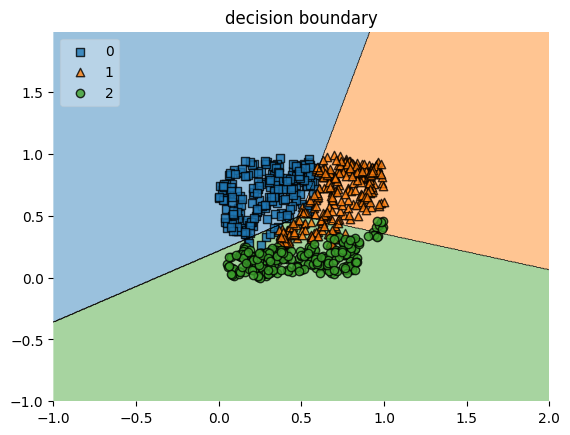

In [26]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=model_sgd, legend=2)
plt.title('decision boundary')
plt.show()


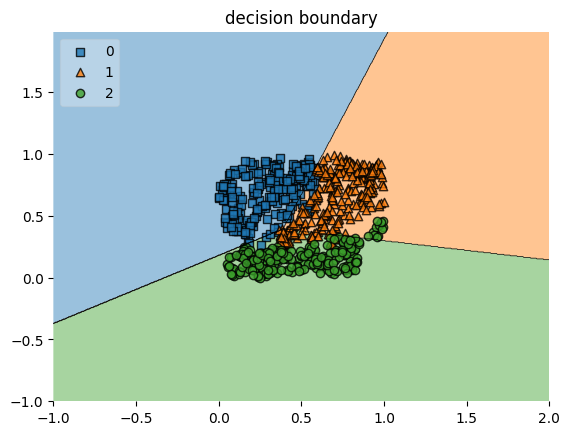

In [27]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=lr_model, legend=2)
plt.title('decision boundary')
plt.show()


(array([  4,   7,  12,  21,  63,  71,  79,  81,  82,  87,  90,  94, 106,
       123, 125, 127, 155, 158, 162, 169, 174, 185, 198]),)


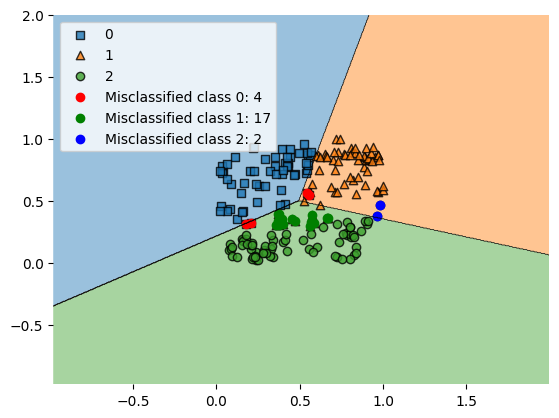

In [28]:
plot_decision_regions(x_test,y_test,clf=model_sgd)
# شناسایی داده‌های اشتباه کلاس‌بندی شده
misclassified = np.where(y_test != y_pred)
print(misclassified)
# تعداد خطاهای کلاس‌بندی شده برای هر کلاس
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)
errors_class_2 = np.sum(y_test[misclassified] == 2)
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 0 با رنگ قرمز
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 1 با رنگ سبز
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 2 با رنگ آبی
plt.scatter(x_test[misclassified][y_test[misclassified] == 2, 0],
            x_test[misclassified][y_test[misclassified] == 2, 1],
            color='blue', label=f'Misclassified class 2: {errors_class_2}')
plt.legend()
